In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

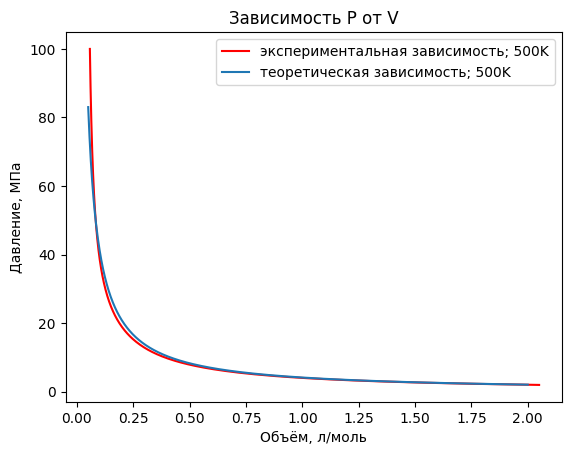

In [ ]:
data1 = pd.read_table('CO2500.txt', sep='s+', engine='python')
p1 = data1["Pressure(MPa)"]
v1 = data1["Volume(l/mol)"]

data2 = pd.read_table('N2500.txt', sep='s+', engine='python')
p2 = data2["Pressure(MPa)"]
v2 = data2["Volume(l/mol)"]

p = 0.965 * p1 + 0.035 * p2
v = 0.965 * v1 + 0.035 * v2

R = 8.31
plt.plot(v, p, color="red", label='экспериментальная зависимость; 500K')
plt.ylabel('Давление, МПа')
plt.xlabel('Объём, л/моль')

def Vdv(a, b, V, T):
    return ((R * T) / (V - b) - a / V**2) / 10**3

Vt = np.linspace(0.05, 2, num=1000)

TkN2 = 126
PkN2 = 3.39 * 10**6
TkCO2 = 304
PkCO2 = 7.38 * 10**6

bN2 = R * TkN2 / (8 * PkN2)
aN2 = 27 * R * TkN2 * bN2 / 8

bCO2 = R * TkCO2 / (8 * PkCO2)
aCO2 = 27 * R * TkCO2 * bCO2 / 8

P_N2 = Vdv(aN2, bN2, Vt, 500)
P_CO2 = Vdv(aCO2, bCO2, Vt, 500)

Pt = P_CO2 * 0.965 + P_N2 * 0.035

plt.plot(Vt, Pt, label='теоретическая зависимость; 500K')

plt.title("Зависимость P от V")
plt.legend()

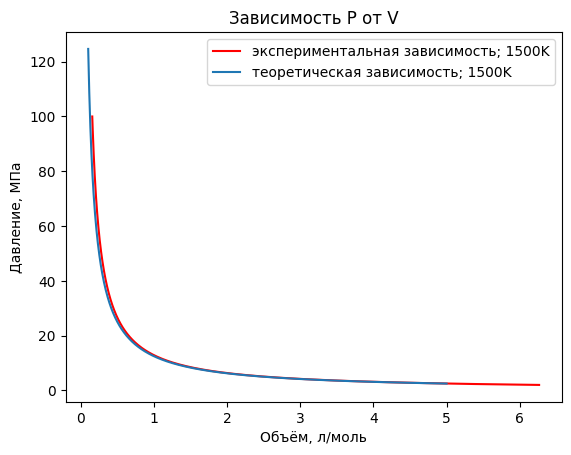

In [ ]:
data1 = pd.read_table('CO21500.txt', sep='s+', engine='python')
p1 = data1["Pressure(MPa)"]
v1 = data1["Volume(l/mol)"]

data2 = pd.read_table('N21500.txt', sep='s+', engine='python')
p2 = data2["Pressure(MPa)"]
v2 = data2["Volume(l/mol)"]

p = 0.965 * p1 + 0.035 * p2
v = 0.965 * v1 + 0.035 * v2

plt.plot(v, p, color="red", label='экспериментальная зависимость; 1500K')
plt.ylabel('Давление, МПа')
plt.xlabel('Объём, л/моль')

Vt = np.linspace(0.1, 5, num=1000)

P_N2 = Vdv(aN2, bN2, Vt, 1500)
P_CO2 = Vdv(aCO2, bCO2, Vt, 1500)

Pt = P_CO2 * 0.965 + P_N2 * 0.035

plt.plot(Vt, Pt, label='теоретическая зависимость; 1500K')

plt.title("Зависимость P от V")
plt.legend()
plt.show()

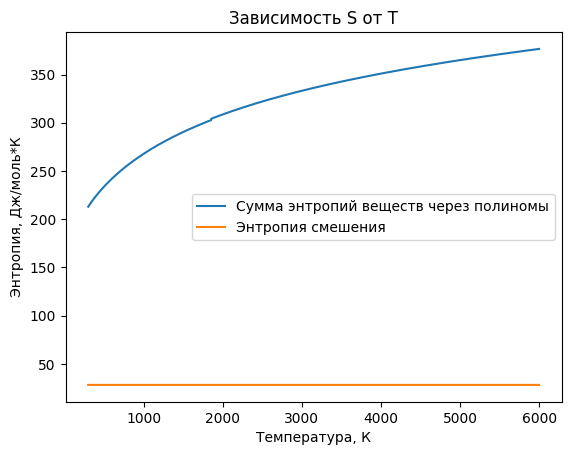

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Энтропии CO2 и N2 через полиномы

# N2
A1 = [19.50583, 35.51872]
B1 = [19.88705, 1.128728]
C1 = [-8.598535, -0.196103]
D1 = [1.369784, 0.014662]
E1 = [0.527601, -4.553760]
G1 = [212.3900, 263.6125]
T = np.linspace(298, 6000, 5500) / 1000
SN2 = np.zeros(5500)

for i in range(len(SN2)):
    if i < 1500:
        SN2[i] = (A1[0] * math.log(T[i]) + B1[0] * T[i] +
                  C1[0] * T[i]**2 / 2 + D1[0] * T[i]**3 / 3 -
                  E1[0] / (2 * T[i]**2) + G1[0])
    else:
        SN2[i] = (A1[1] * math.log(T[i]) + B1[1] * T[i] +
                  C1[1] * T[i]**2 / 2 + D1[1] * T[i]**3 / 3 -
                  E1[1] / (2 * T[i]**2) + G1[1])

# CO2
A2 = [24.99735, 58.16639]
B2 = [55.18696, 2.720074]
C2 = [-33.69137, -0.492289]
D2 = [7.948387, 0.038844]
E2 = [-0.136638, -6.447293]
G2 = [228.2431, 263.6125]
SCO2 = np.zeros(5500)

for i in range(len(SCO2)):
    if i < 902:
        SCO2[i] = (A2[0] * math.log(T[i]) + B2[0] * T[i] +
                    C2[0] * T[i]**2 / 2 + D2[0] * T[i]**3 / 3 -
                    E2[0] / (2 * T[i]**2) + G2[0])
    else:
        SCO2[i] = (A2[1] * math.log(T[i]) + B2[1] * T[i] +
                    C2[1] * T[i]**2 / 2 + D2[1] * T[i]**3 / 3 -
                    E2[1] / (2 * T[i]**2) + G2[1])

S = np.zeros(5500)
for i in range(len(S)):
    S[i] = 0.035 * SN2[i] + 0.965 * SCO2[i]

plt.plot(T * 1000, S, label='Сумма энтропий веществ через полиномы')

R = 8.314  # Универсальная газовая постоянная
dS = [-R * (math.log(0.965) + math.log(0.035))] * 5500
plt.plot(T * 1000, dS, label='Энтропия смешения')

plt.xlabel('Температура, К')
plt.ylabel('Энтропия, Дж/моль*К')
plt.title("Зависимость S от T")
plt.legend()
plt.show()


#Энтропия смешения мала по сравнению с общей энтропией

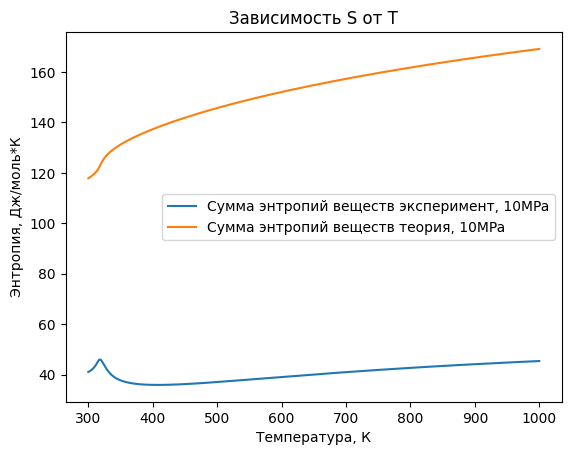

In [ ]:
# Загрузка данных из файлов
data5 = pd.read_table('CO210.txt', sep='s+', engine='python')
data6 = pd.read_table('N210.txt', sep='s+', engine='python')

SpCO2 = data5["Entropy(J/mol*K)"]
SpN2 = data6["Entropy(J/mol*K)"]
T = data5["Temperature(K)"]
VCO2 = data5["Volume(l/mol)"]
VN2 = data6["Volume(l/mol)"]
CvCO2 = data5["Cv(J/mol*K)"]
CvN2 = data6["Cv(J/mol*K)"]

# Расчет суммы энтропий
Ss = [0] * 601
for i in range(len(Ss)):
    Ss[i] = 0.965 * SpCO2[i] + 0.035 * SpN2[i]

plt.plot(T, Ss, label='Сумма энтропий веществ эксперимент, 10MPa')

# Расчет теоретической суммы энтропий
g2 = [0] * 601
for i in range(601):
    g2[i] = (R * (0.965 * (3 * math.log(T[i]) +
              math.log((0.965 * VCO2[i] + 0.035 * VN2[i] - bN2 - bCO2) / 0.965)) +
              0.035 * (1.5 * math.log(T[i]) +
              math.log((0.965 * VCO2[i] + 0.035 * VN2[i] - bN2 - bCO2) / 0.035)))) # тут для вдв газа Cv с мю=1
              # g2[i] = (0.965 * (CvCO2[i] * math.log(T[i]) +
              #                  math.log((0.965 * VCO2[i] + 0.035 * VN2[i] - bN2 - bCO2) / 0.965)) +
              #          0.035 * (CvN2[i] * math.log(T[i]) +
              #                  math.log((0.965 * VCO2[i] + 0.035 * VN2[i] - bN2 - bCO2) / 0.035))) # тут экспериментальные Cv

plt.plot(T, g2, label='Сумма энтропий веществ теория, 10MPa')

plt.xlabel('Температура, К')
plt.ylabel('Энтропия, Дж/моль*К')
plt.title("Зависимость S от T")
plt.legend()
plt.show()
